<a href="https://colab.research.google.com/github/KC-ai/BrainTumor/blob/main/Brain_Tumor_Classification_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#access dataset
import os

#data manipulation
import pandas as pd

#numerical computing
import numpy as np

#visualizing our data
import matplotlib.pyplot as plt

#advanced visualizations
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip
#download dataset from kaggle put it in colab and unzip it for our use

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:03<00:00, 42.5MB/s]
100% 149M/149M [00:03<00:00, 42.4MB/s]


In [3]:
#we want to get the metadata of the data into pandas dataframes

#function takes in a path which is directory in which dataset is stored and iterates through and loads the metadata into a dataframe
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df


In [4]:
#call the training dataset and make the dataframe for that

tr_df = get_class_paths("/content/Training")

#every path or image can be seen with what class its a part of, class path and class image belongs to
tr_df

,Class Path,Class
0,/content/Training/meningioma/Tr-me_1245.jpg,meningioma
1,/content/Training/meningioma/Tr-me_0590.jpg,meningioma
2,/content/Training/meningioma/Tr-me_0153.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0130.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0024.jpg,meningioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_1392.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_1049.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0248.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0790.jpg,pituitary


In [5]:
#doing it with the testing dataset
ts_df = get_class_paths("/content/Testing")

ts_df


,Class Path,Class
0,/content/Testing/meningioma/Te-me_0208.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0151.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0046.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0112.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0034.jpg,meningioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0140.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0011.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0269.jpg,pituitary
1309,/content/Testing/pituitary/Te-piTr_0007.jpg,pituitary


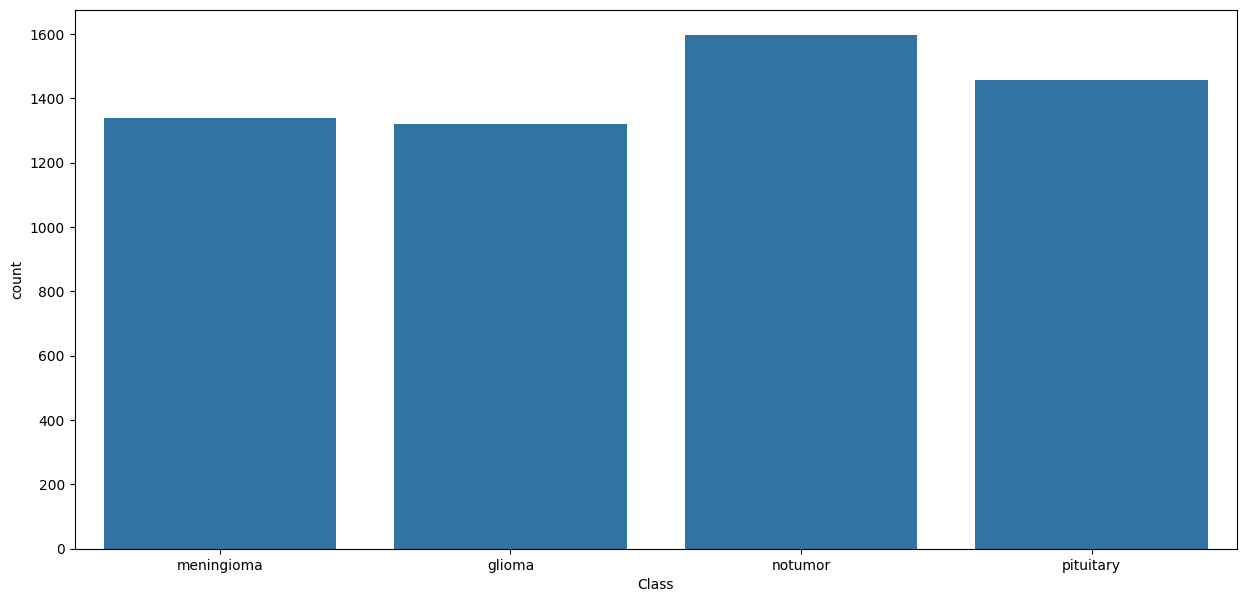

In [6]:
plt.figure(figsize=(15, 7))

ax = sns.countplot(data=tr_df, x= tr_df['Class'])
#this is bar plot of tumors and count of how many of each class - this ensures balance and we can ensure if its balanced we can work with it

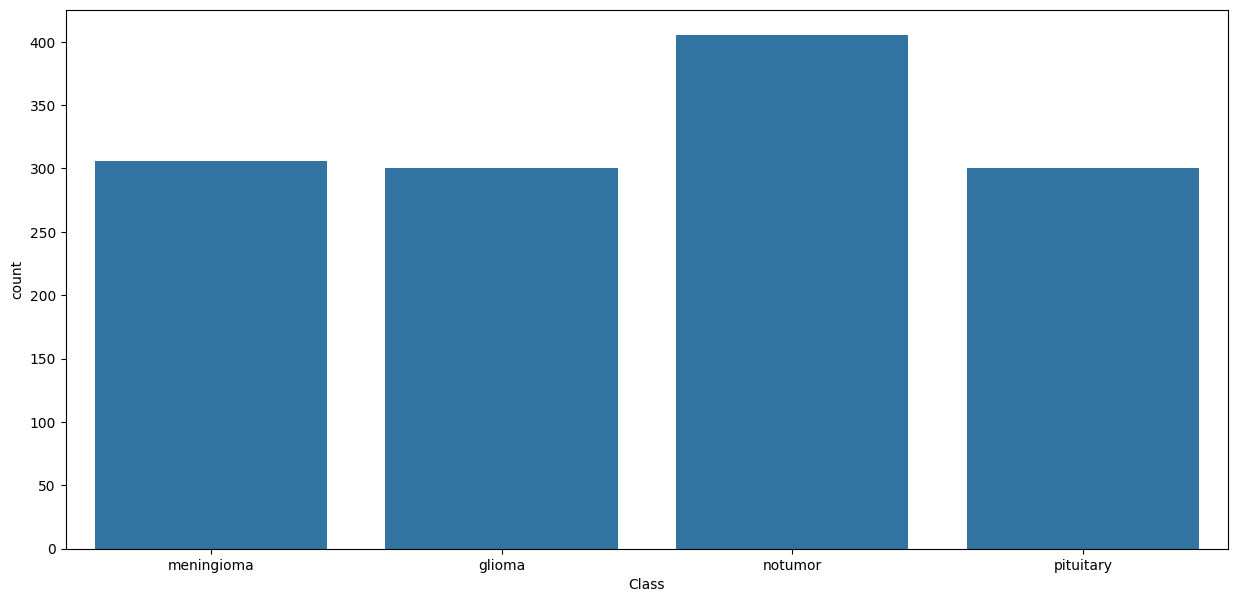

In [7]:
#lets do it with the testing dataset, and its fairly balanced so we can go ahead with normal approach without dealing w over/under sampling
plt.figure(figsize=(15, 7))

ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [8]:
#now lets split into training, validation, and testing datasets, validation is just checkpoints for the training datasets

from sklearn.model_selection import train_test_split

#evaluate perf of model with confusion matric and classification

from sklearn.metrics import classification_report, confusion_matrix

#tensorflow is deep learning library
#sequential lets us build nn layer by layer - makes it easy to understand arch of dl models, we add layers linearly
import tensorflow as tf
from tensorflow.keras.models import Sequential

#layers optimizers metrics we use to train the model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#TO DO - FAMILIARIZE YOURSELF WITH THESE LIBRARIES AND THEIR VARIOUS DL FUNCTIONS AND WHAT DL USE CASES ARE VS ML

In [9]:
#we need to tune the model and prevent overfitting with validation
#testing dataset is 2 equal parts w 0.25, into validation and testing
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])
#we use stratify parameter to ensure data is split in a way that maintains same proportion of each class label in both training and testing dataset as it exists in normal dataset




In [10]:
#we check to see if the split is even and how they look like
valid_df


,Class Path,Class
1158,/content/Testing/pituitary/Te-pi_0112.jpg,pituitary
1036,/content/Testing/pituitary/Te-pi_0164.jpg,pituitary
1092,/content/Testing/pituitary/Te-piTr_0003.jpg,pituitary
497,/content/Testing/glioma/Te-gl_0298.jpg,glioma
947,/content/Testing/notumor/Te-no_0116.jpg,notumor
...,...,...
1085,/content/Testing/pituitary/Te-pi_0196.jpg,pituitary
362,/content/Testing/glioma/Te-gl_0206.jpg,glioma
55,/content/Testing/meningioma/Te-me_0144.jpg,meningioma
1205,/content/Testing/pituitary/Te-pi_0020.jpg,pituitary


In [11]:
ts_df

,Class Path,Class
1107,/content/Testing/pituitary/Te-pi_0297.jpg,pituitary
373,/content/Testing/glioma/Te-gl_0141.jpg,glioma
182,/content/Testing/meningioma/Te-me_0252.jpg,meningioma
704,/content/Testing/notumor/Te-no_0162.jpg,notumor
674,/content/Testing/notumor/Te-no_0071.jpg,notumor
...,...,...
1209,/content/Testing/pituitary/Te-pi_0190.jpg,pituitary
1194,/content/Testing/pituitary/Te-pi_0254.jpg,pituitary
970,/content/Testing/notumor/Te-no_0309.jpg,notumor
12,/content/Testing/meningioma/Te-me_0186.jpg,meningioma


In [12]:
#we now need to pre process our data to clean it out and prevent bs data so our model is as accurate as possible.

#we need to set up some basic params: batch size - number of images model processes at once
batch_size = 32 #play around with this to see what the best performance is
#TO DO - LOOK AT INDUSTRY STANDARD BATCH SIZES

#by resizing images to be same size, ensure same dimensions and it doesnt throw off our model
img_size = (299, 299)

#we rescale pixel values and normalize them between 0 and 1 and make brightness random bw a range for robustness and genrralize better to new data
image_generator = ImageDataGenerator(rescale = 1/255, brightness_range = (0.8, 1.2))

#for testing we dont mess w it so that we can ensure consistency to make sure the model is properly performing
ts_gen = ImageDataGenerator(rescale = 1/255)

#QUESTION: WHY DO WE USE AN IMAGE GENERATOR FUNCTION? WHAT DOES THIS DO? ARE WE CREATING COMPLETELY NEW IMAGES?
#ANSWER: GENERATOR ensures we process data in real time and thus saves memory and computational cost
#we can load and mess with images in batches


Generalization? Maybe in industry when pre processing data different generator functions are made like this so we can directly access them

In [13]:
#lets take these generators and create 3 data flows - one for training one for validaitona nd one for testing
#these flows take image data and prep them to be fed to DL model

#this code takes training df and creates flow of images from df, takes image paths, loads images and resizes the image, and preps them for our model
#we have the batch size as 32 and y col is label for images (type of tumor prez in img), change df to be valid df
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size)

#same for validation gen flow
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size)


#for training and validation flows, same batch and img size, but for testing flow, smaller batch size and we don't shuffle data since for testing we want to keep order of data consistent
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=16, shuffle = False)




Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


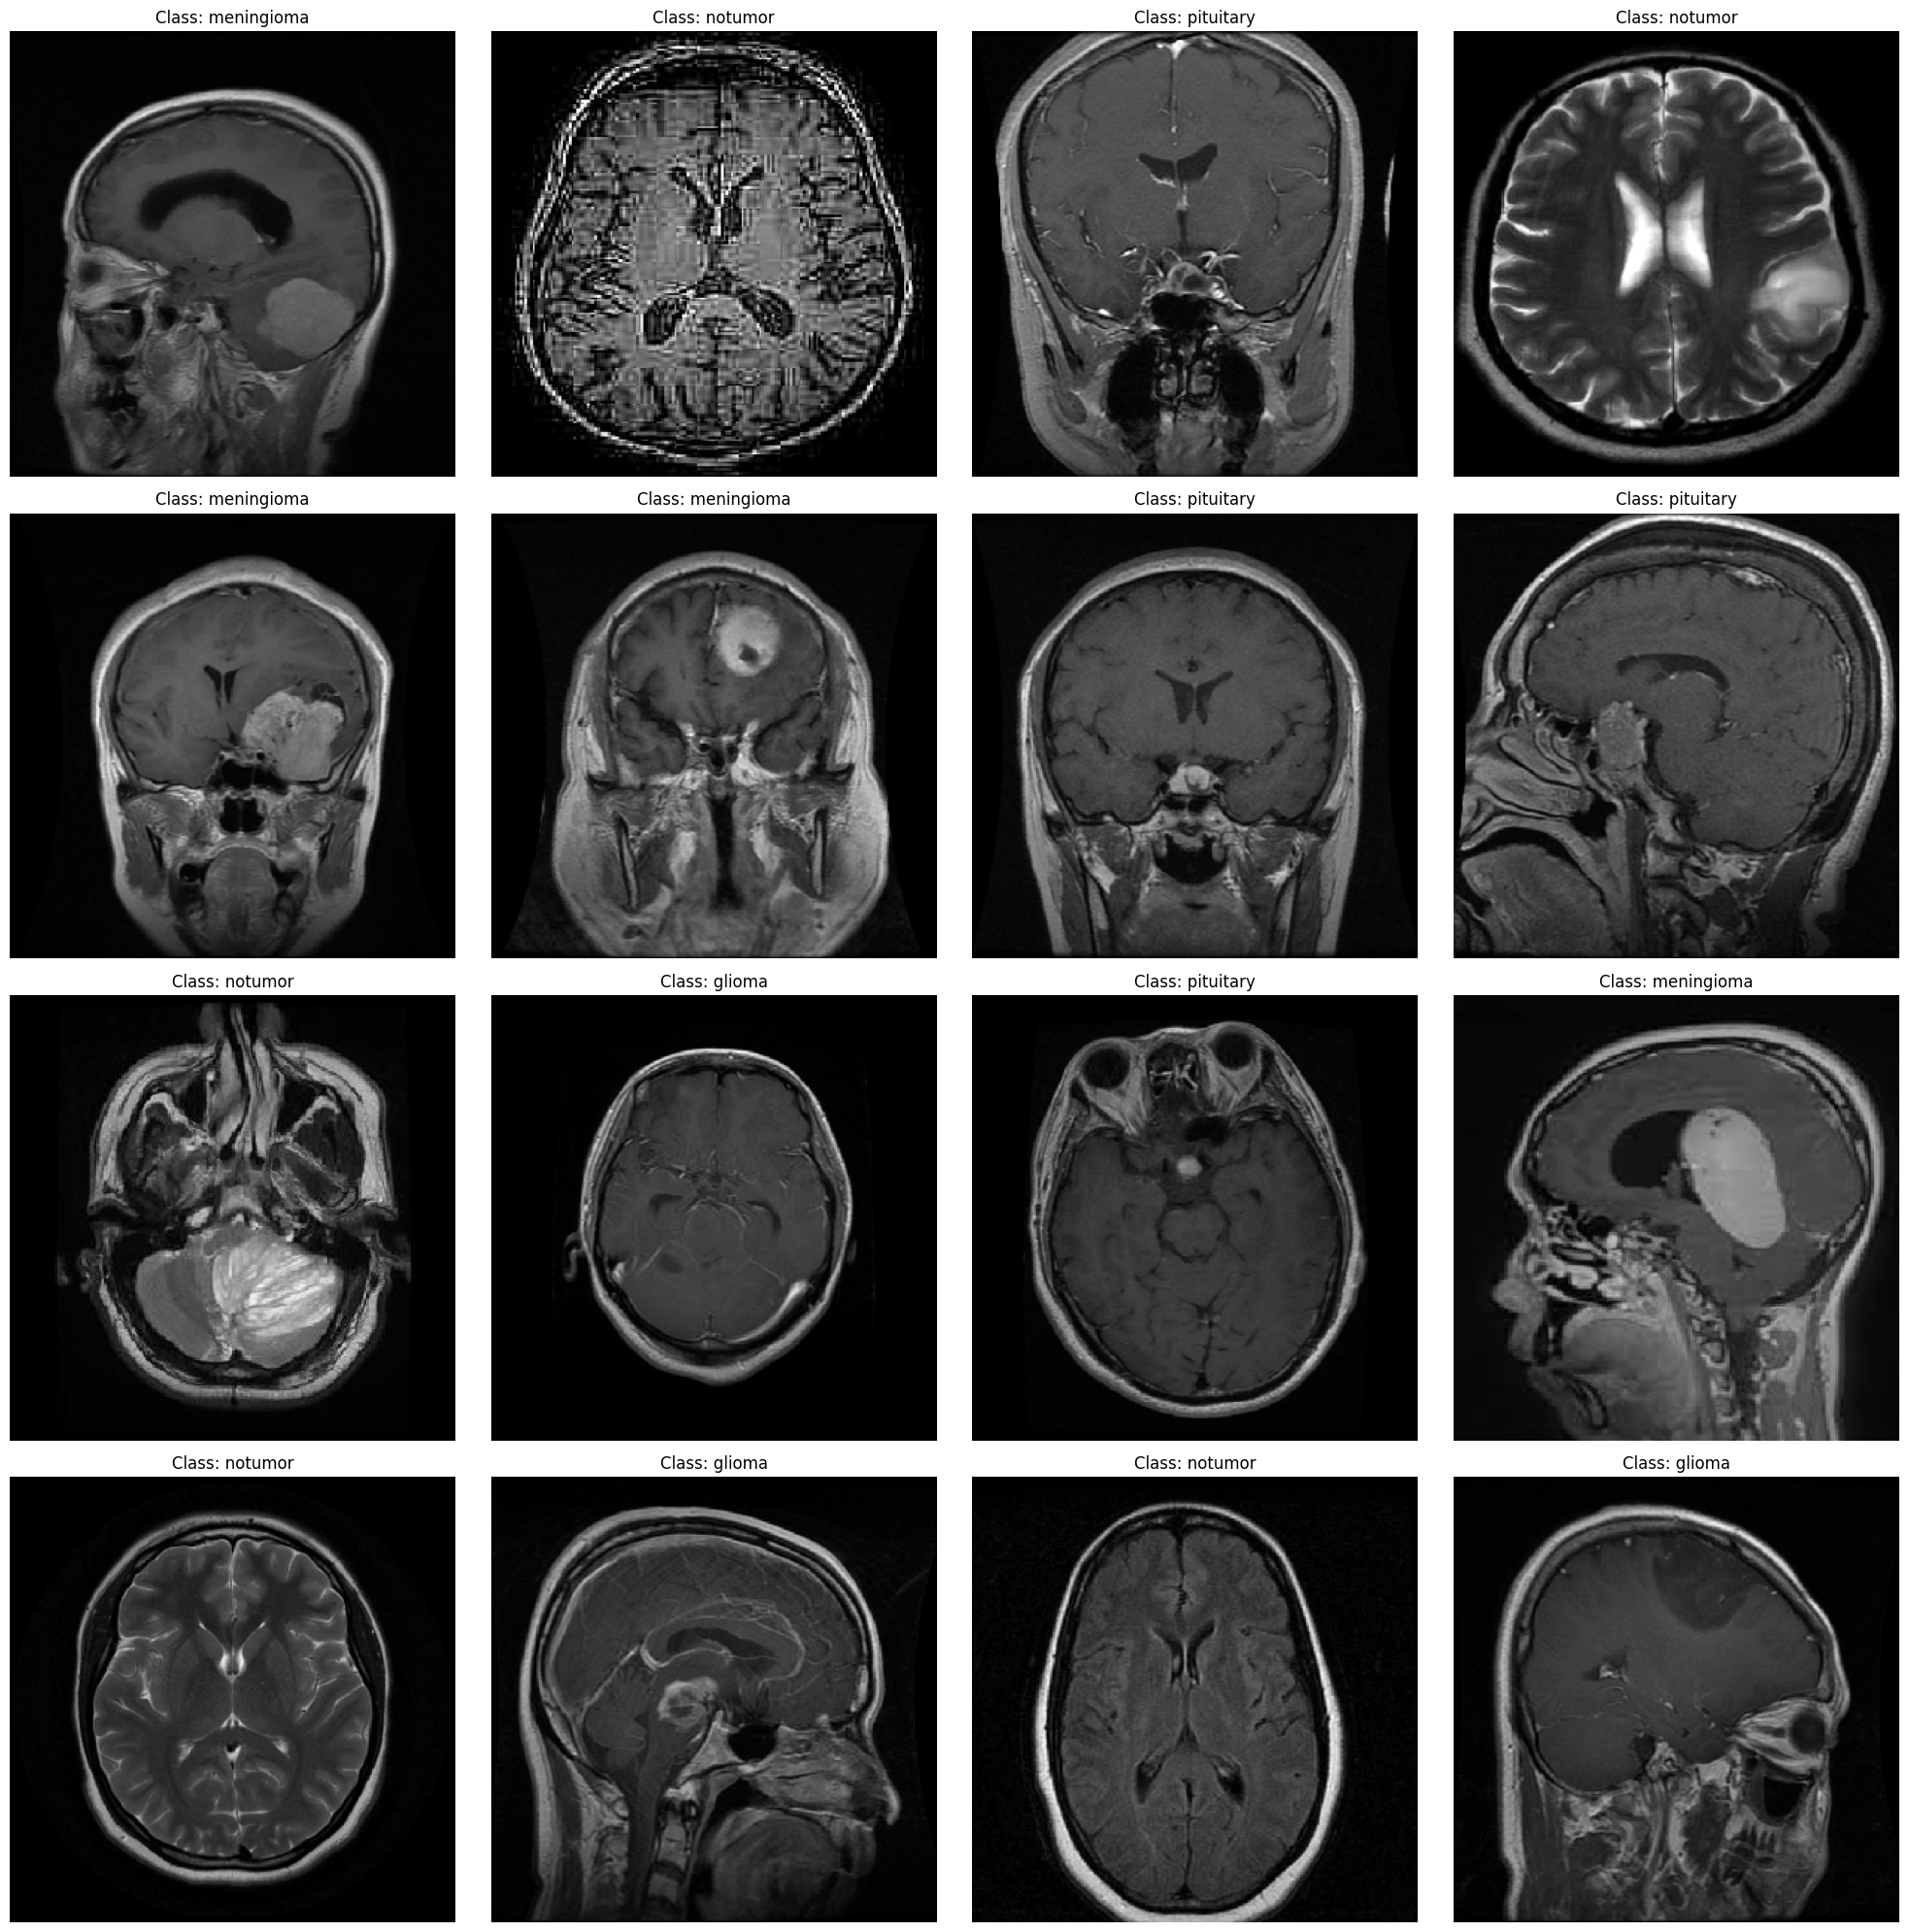

In [14]:
#lets look at a few images from our training set

#this code is creating 4x4 grid subplots each displaying image in training data generator

#creates new figure for grid of images with specified size of 20x20 inches - makes space for all the images like setting a canvas
plt.figure(figsize=(20, 20))

#loops 16 times to create grid of 16 images (4 rows 4 cols)
for i in range(16):

  #adds a subplot in the figure - defining the 4x4 grid. Parameter i+1 specifies position of current image in grid
    plt.subplot(4, 4, i + 1)

    #fetches next batch of images and labels from training data (im guessing next is a generator function)
    #batch[0] is batch of images and batch[1] is the corresponding label
    batch = next(tr_gen)

    #extracts first image from current batch
    image = batch[0][0]

    #extracts corr label from first image in batch (one hot encoding)

    label = batch[1][0]

    #displays image using matplotlib
    plt.imshow(image)

    # Get the class index by converting one hot encoded label into its class index by finding position of the maximum val in 1 hot array
    class_index = np.argmax(label)


  #so up till here, we find our image and get the label of it using one hot encoding so the index of that image

#then we find the overall class names and class indices and we find the exact position of the image
    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [15]:
#we want to create a model to account for all these differences, with the "harder" images in the training set with the training data generator

#we'll use the xception model using transfer learning - its pre trained on a large dataset and we'll use it to extract features by freezing some layers to use learned features and train only the final layers for the new task
#then we fine tune this and unfreeze some layers to adapt to the model further to the new dataset
#its like piggy backing off a really cracked model so you can reap the benefits of fitting that to yours to create a custom one

#TO DO- FIND THE INDUSTRY STANDARD MODELS THAT ARE USED AND PRACTICES FOR THEM LIKE TRANSFER LEARNING


img_shape = (299, 299, 3)
#299 pixels and 3 since RGB so 3 color channels


#loads Xception model and exludes the dense layers at the top of the models since we are doing transfer learning
#this ensures the model is a feature extractor instead of a classifier, and the weights are pretrained on ImageNet for learned features there
#the image shape is the input image
#the pooling is going to be max pooling to select max val from each feature map so we have flattened feature vector output
#this is a smart summarizer that keeps the standout pixel and reduces amnt of info to process while retaining details

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling="max"
)

#this takes the xception model we add a few layer to it, take output from xception and transform it into 4 classifications
#helps model generalize better to new data by using dropout
#everything else you know, liek the activation functions and the number of neurons and all

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])





83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [16]:
#lets compile the model now
#we will use adamax to help tell you how big your steps should be when updating weights

model.compile(
    Adamax(learning_rate=0.001), #good starting point
    loss='categorical_crossentropy', #loss function thats used in classification - penalizes model heavily for incorrect
    metrics=['accuracy', Precision(), Recall()]
)

#learning rate - low means small slow steps but learns better
#high lr is faster but may overshoot and not learn as well

#training dl models more expensive thus key is to find learning rate that allows model to learn quick and accurate

In [ ]:
#lets train our ml model to classify our stuff

#our epochs is 5 so entire training dataset is 5 times and each pass will help update the weights
hist = model.fit(tr_gen, epochs = 5, validation_data=valid_gen)

#use a gpu instead of cpu
#TO DO - LOOK WHY GPU BETTER THAN CPU AND OTHER COMPUTER ARCH FACTORS TO HELP SPEED

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.7960 - loss: 0.6019 - precision: 0.8442 - recall: 0.7058 - val_accuracy: 0.8626 - val_loss: 0.3908 - val_precision: 0.8798 - val_recall: 0.8382
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 138s 767ms/step - accuracy: 0.9828 - loss: 0.0457 - precision: 0.9846 - recall: 0.9822 - val_accuracy: 0.9450 - val_loss: 0.1343 - val_precision: 0.9577 - val_recall: 0.9344
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 767ms/step - accuracy: 0.9932 - loss: 0.0184 - precision: 0.9937 - recall: 0.9930 - val_accuracy: 0.9908 - val_loss: 0.0236 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 770ms/step - accuracy: 0.9967 - loss: 0.0112 - precision: 0.9968 - recall: 0.9967 - val_accuracy: 0.9771 - val_loss: 0.0561 - val_precision: 0.9786 - val_recall: 0.9771
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 741ms/step - accuracy: 0.9965 - loss: 0.0126 - precision: 0.9965 - recall: 0.9965

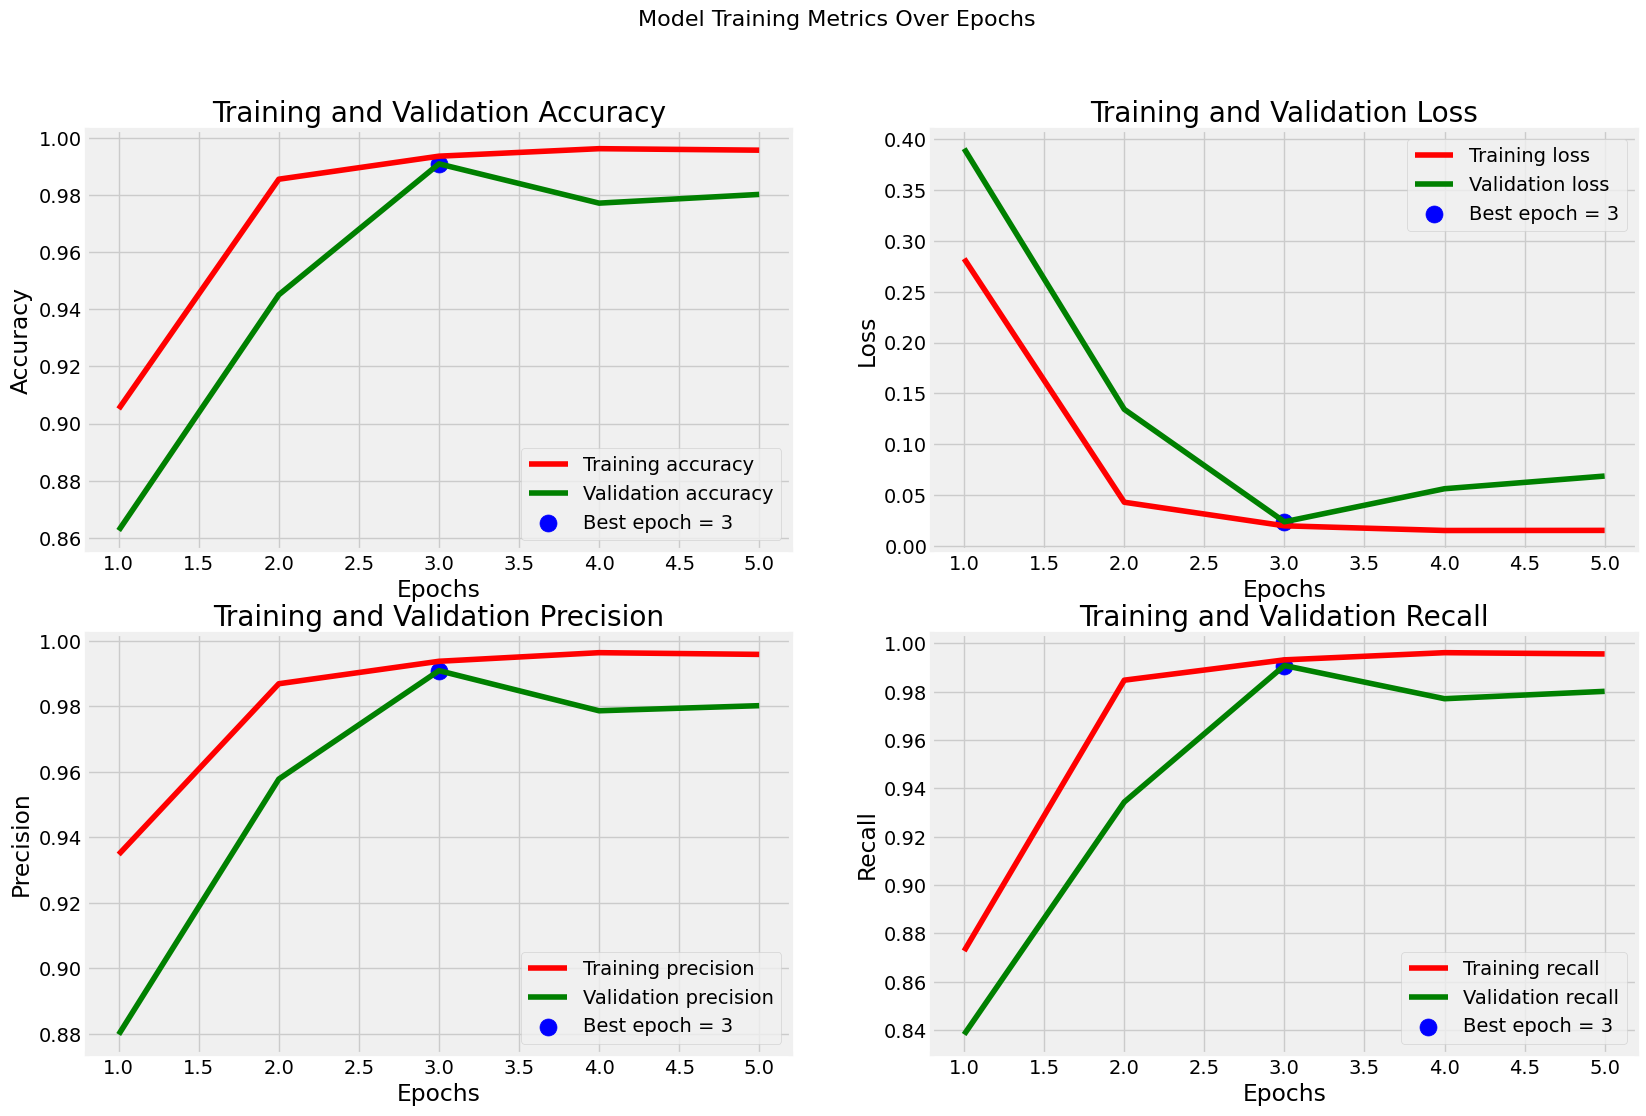

In [18]:



# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)
    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [19]:
#TO DO - FAMILIARIZE YOURSELF WITH THE RIGHT TYPE OF GRAPHS AND TRENDS IN ML TRAINING

#if loss isnt decreasing over time your mdoel isnt learning

train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1] * 100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1] * 100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")



179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 242ms/step - accuracy: 0.9975 - loss: 0.0062 - precision: 0.9975 - recall: 0.9975
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.9782 - loss: 0.0758 - precision: 0.9782 - recall: 0.9782
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 1.0000 - loss: 8.6585e-05 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9811 - loss: 0.0617 - precision: 0.9811 - recall: 0.9811
Train Accuracy: 99.82%
Train Loss: 0.0054


Validation Accuracy: 97.86%
Validation Loss: 0.0744


Test Accuracy: 98.17%
Test Loss: 0.0598


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step


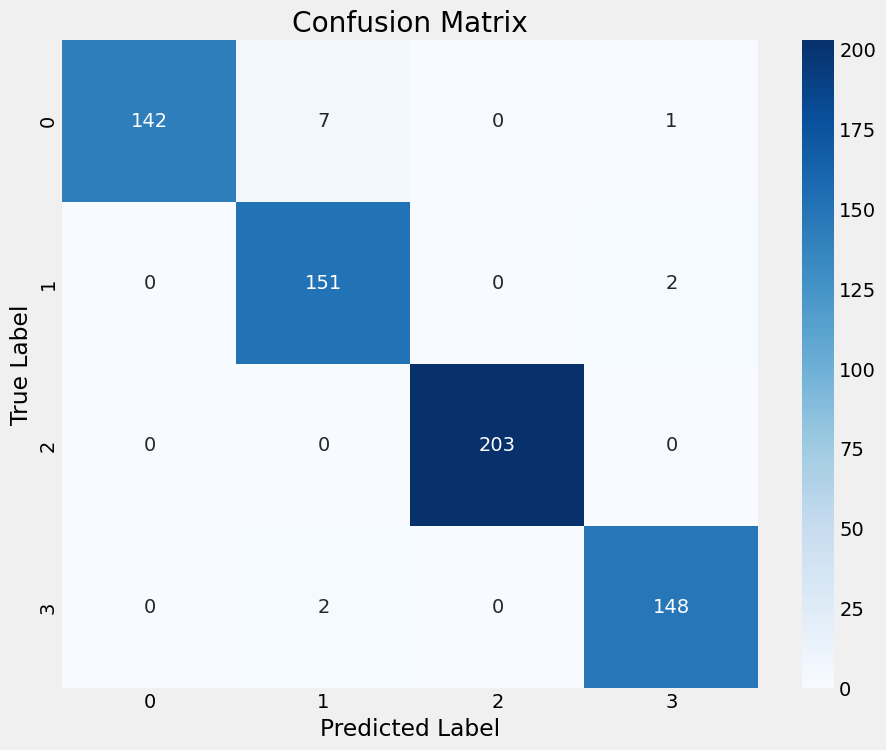

In [21]:
#training score #how well model elarned pattern trained on

#validation score - training process effectivr

#test score - realistic view of model on unseen data
#TO DO - SEE WHAT GENERAL METRICS ARE FOR REAL WORLD MODELS

#lets use a confusion matrix to see where model makes mistakes and succeeds

#we get max probabilities for each class
preds = model.predict(ts_gen)

#what class highest prob - most confident about what class
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#high diagonal so fire

This confusion matrix helps us determine was type of classes the model is bad at predicting, and where we should "fortify" it

In [22]:
from PIL import Image

#this function visualizes the prediciton of our model on a few test images
#we take in image path of mri scan and look at the mri image and 2 a bar chart on how confident the model is on label

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)

    #resize image
    resized_img = img.resize((299, 299))

    #convert img array to be bw 0 and 1
    img_array = np.array(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities, how confident on each type of tumor
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


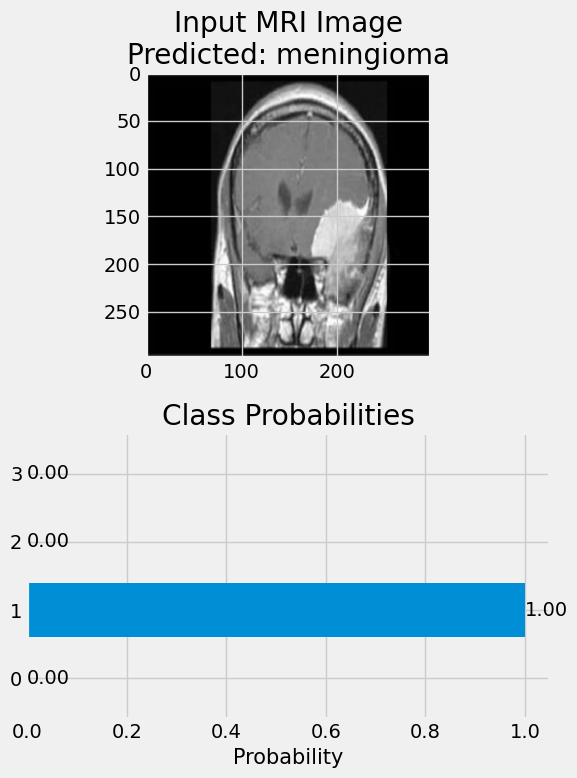


Predicted tumor type: meningioma


In [23]:
#lets test it

predict("/content/Testing/meningioma/Te-meTr_0000.jpg")
#in colab, /content is the file path

Our model is confident!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


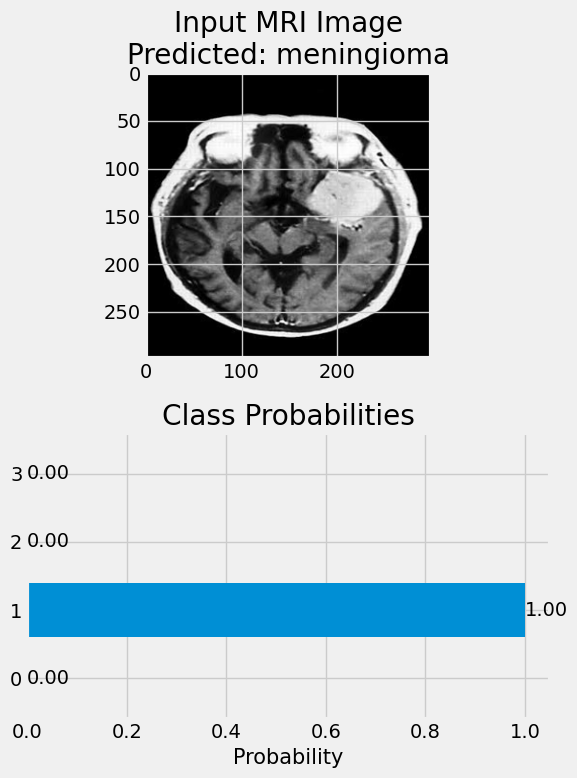


Predicted tumor type: meningioma


In [24]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


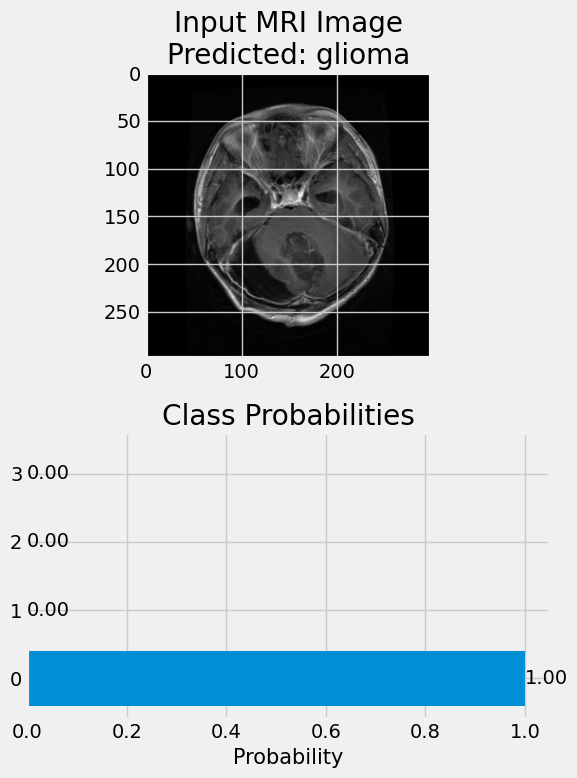


Predicted tumor type: glioma


In [25]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [28]:
#lets save the models weights so we can use them in our web app to serve our model and its predictions
model.save_weights("xception_model.weights.h5")

In [47]:
model.save("xception_model.keras")

In [31]:
#lets see if we can train a smaller model with less convolutional layers and get a similar level of accuracy.
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [32]:

batch_size = 16

#lets reduce our image size to reduce memory
img_size = (224, 224)

#going above this batch and image size we'll get error cuz not enough mem on colab

image_generator = ImageDataGenerator(rescale = 1/255, brightness_range = (0.8, 1.2))

ts_gen = ImageDataGenerator(rescale = 1/255)

#re initialize to account for new batch and img size

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=16, shuffle = False)




Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [35]:
# Create a Sequential model - stackig layers on top of each other to build our models
cnn_model = Sequential()

# Convolutional layers - 4 convolutional blocks. These filters each specialize in identifying a different feature
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

#these filters look for more complex patterns
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.L2(0.01)))
cnn_model.add(Dropout(0.35))

#4 layers to identify each type of neuron
cnn_model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()





# there;s some common best practices when developing with CNNs,
# 1 of them is every number of layers is going to be a power of 2, and deeper in network is increase or decrease # of filters
#
#


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs = 5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 150s 349ms/step - accuracy: 0.5579 - loss: 2.4089 - precision_3: 0.7033 - recall_3: 0.3850 - val_accuracy: 0.7511 - val_loss: 0.9714 - val_precision_3: 0.7791 - val_recall_3: 0.6947
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 163s 304ms/step - accuracy: 0.8053 - loss: 0.8290 - precision_3: 0.8285 - recall_3: 0.7699 - val_accuracy: 0.8076 - val_loss: 0.7040 - val_precision_3: 0.8400 - val_recall_3: 0.7695
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 299ms/step - accuracy: 0.8406 - loss: 0.6371 - precision_3: 0.8572 - recall_3: 0.8191 - val_accuracy: 0.7817 - val_loss: 0.7092 - val_precision_3: 0.7958 - val_recall_3: 0.7496
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 141s 297ms/step - accuracy: 0.8778 - loss: 0.5166 - precision_3: 0.8882 - recall_3: 0.8639 - val_accuracy: 0.8733 - val_loss: 0.5064 - val_precision_3: 0.8898 - val_recall_3: 0.8504
Epoch 5/5
213/357 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - accuracy: 0.8964 - loss: 0.4448 - precision_3: 0.9025 - recall_3: 0.88

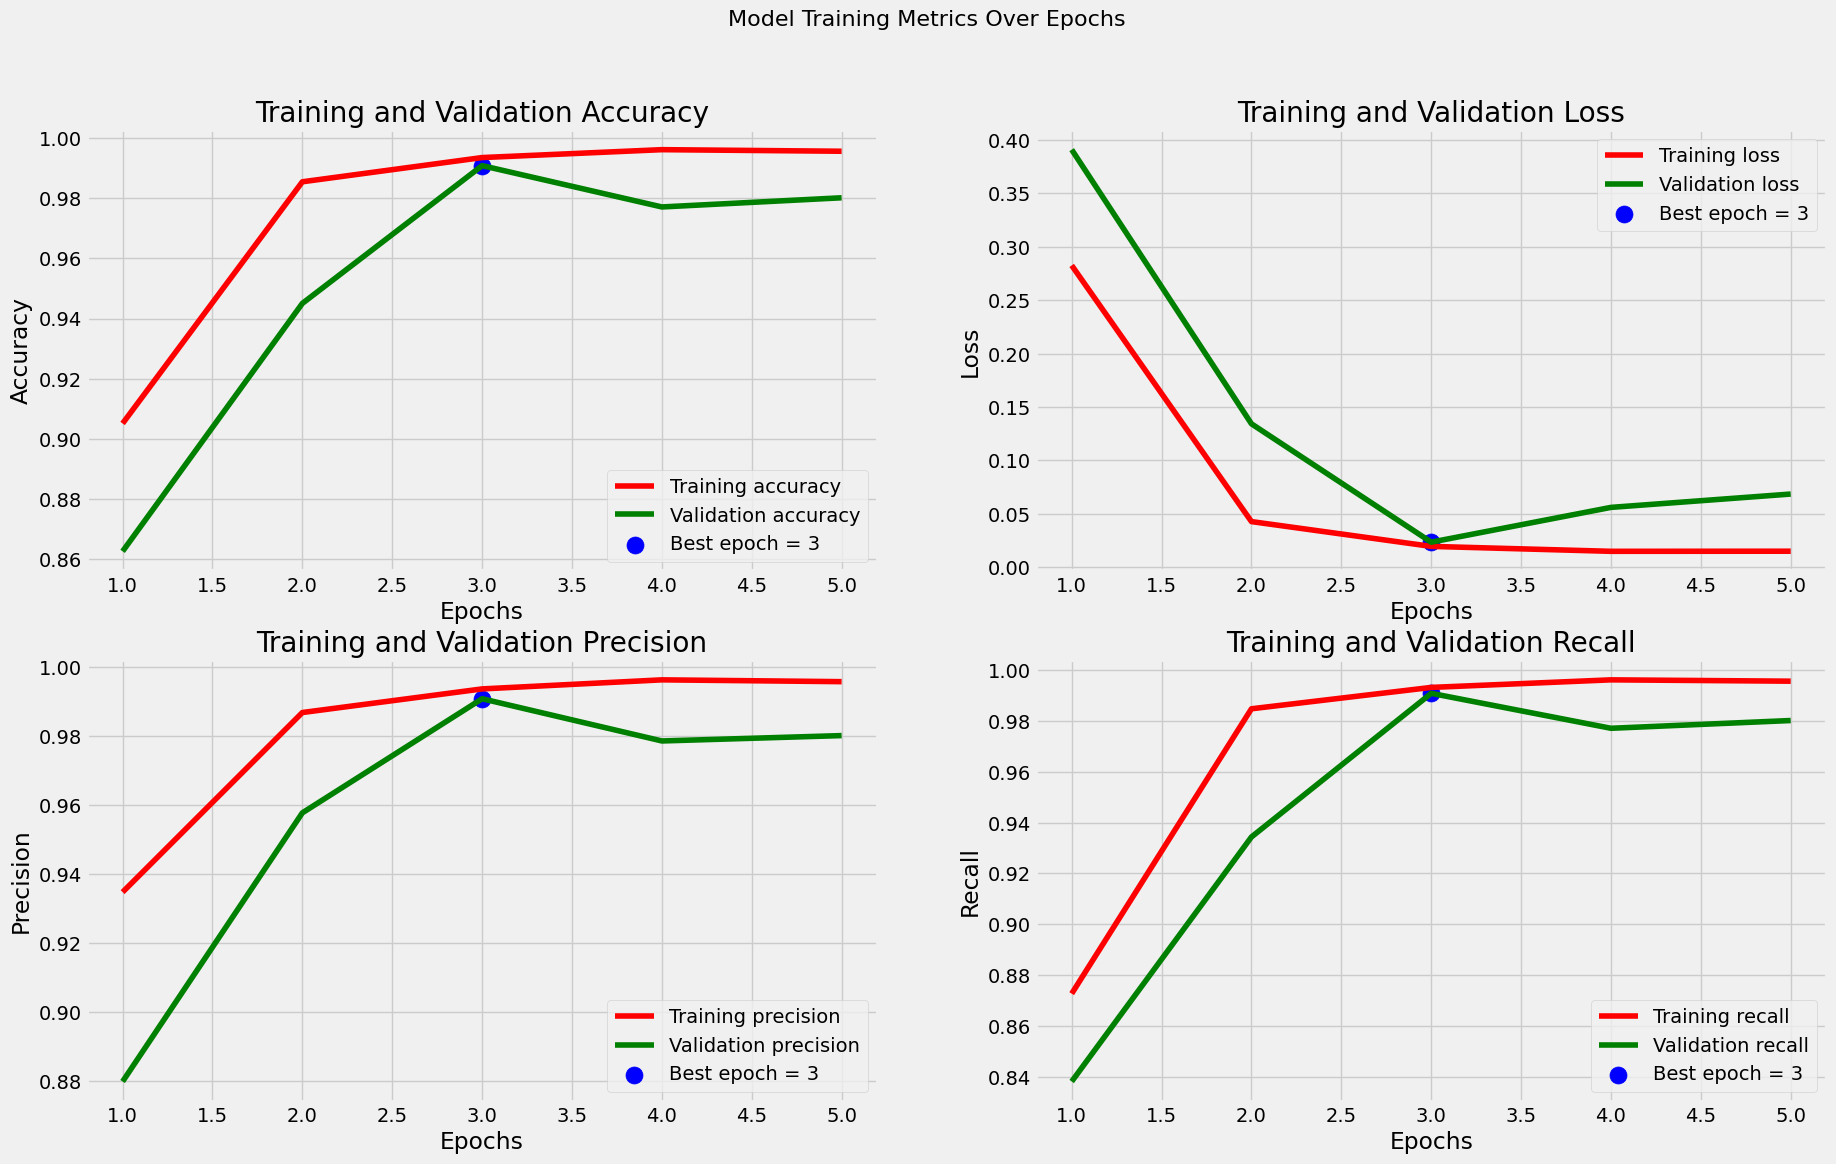

In [38]:


# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)
    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [42]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1] * 100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1] * 100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.9456 - loss: 0.3383 - precision_3: 0.9480 - recall_3: 0.9390
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8935 - loss: 0.4333 - precision_3: 0.8947 - recall_3: 0.8826
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9074 - loss: 0.3998 - precision_3: 0.9100 - recall_3: 0.8924
Train Accuracy: 94.14%
Train Loss: 0.3463


Validation Accuracy: 88.70%
Validation Loss: 0.4588


Test Accuracy: 89.02%
Test Loss: 0.4402


In [135]:
preds = cnn_model.predict(ts_gen)

#what class highest prob - most confident about what class
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Testing/pituitary/Te-pi_0297.jpg'

In [44]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

#precision is when the patient has tumor but the model identifies tham as not having one

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       150
           1       0.83      0.71      0.76       153
           2       0.90      1.00      0.95       203
           3       0.91      0.99      0.95       150

    accuracy                           0.89       656
   macro avg       0.89      0.88      0.88       656
weighted avg       0.89      0.89      0.89       656



In [46]:
cnn_model.save("cnn_model.keras")

Part 2: Streamlit Web App

In [48]:
! pip install streamlit pyngrok python-dotenv
#streamlit lets us create web app easy with python
#pyngrok lets us create secure URL for streamlit web app
#python-dotenev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [51]:
from threading import Thread #server needs to run on separate thread streamlit ui can run concurrently with colab model
from pyngrok import ngrok #secure tunnels to localhost - accessible to others on public even though its running on our local machine
from google.colab import userdata #access secret variable with this

In [131]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [132]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

 #helper function runs our strwamlit app and this uses os.system function that executes command to run streamlit app


In [128]:
%%writefile app.py
#this alows us to save our python file in colab its lit

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

#use gemini models to generate explanations of the mri scans
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv

load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan' in your explanation.
    - Keep your explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step.
    """

    # img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text


#lets make our saliency map
def generate_saliency_map(model, img_array, class_index, img_size):
  #gradient tape is a recorder that watches our image and converts it into a tensor
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]




    # Get gradients to ask what pixels are most important to make decisions
    gradients = tape.gradient(target_class, img_tensor)

    #absolute value and we combine to get 1 value per pixel
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    x, y = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on the original image with increased opacity
    original_img = image.img_to_array(img_array[0])
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    # Save the saliency map
    saliency_map_path = f'saliency_maps/{uploaded_file.name}'
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img


#this helps give the doctors more confidence since it sverifies the models prediciton with their own







def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    #use same code to recreate model exact way it was trained as
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                                input_shape=img_shape, pooling="max")

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    # #only diff, necessary to accept diff image size
    # model.build((None,) + img_shape)

    # Compile the model
    model.compile(Adamax(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=['accuracy', Precision(), Recall()])

    model.load_weights(model_path)

    return model



st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])



if uploaded_file is not None:
  #we want users to choose the model they want and we do this with radio button
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )
  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299, 299)
  else:
    model = load_model ('/content/cnn_model.h5')
    img_size = (224, 224)

  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']

  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
      st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
      st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
  with col2:
      st.image(saliency_map, caption='Saliency Map', use_column_width=True)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""
      <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
          <div style="display: flex; justify-content: space-between; align-items: center;">
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                      {result}
                  </p>
              </div>
              <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                      {prediction[0][class_index]:.4%}
                  </p>
              </div>
          </div>
      </div>
      """,
      unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create a Plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange="reversed")
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
      fig.add_annotation(
          x=prob,
          y=i,
          text=f"{prob:.4f}",
          showarrow=False,
          xanchor="left",
          xshift=5
      )

  # Display the Plotly chart
  st.plotly_chart(fig)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)









#we re run this every time we make changes to our streamlit app

Writing app.py


In [133]:
#we will thread here to concurrently run our streamlit app in background

threat = Thread(target=run_streamlit)
threat.start()

In [134]:
#create public url for our streamlit app

public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
#we're saying give us public url for external users even tho internal app only uses http. gives them security of http
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://8147-35-204-89-29.ngrok-free.app" -> "http://localhost:8501"


In [110]:
#if we get the more than 3 ngrok tunnels error, we can use this code

tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://c870-35-204-89-29.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://df62-35-204-89-29.ngrok-free.app -> http://localhost:8501
